In [3]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
#from sklearn.preprocessing import LabelEncoder


In [4]:
df = pd.read_csv('./age.csv', encoding='utf-8')
df

,年月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,201401,10007000,衣,2,未滿20歲,282,574794
1,201401,10007000,衣,2,20(含)-25歲,7091,16563668
2,201401,10007000,衣,2,25(含)-30歲,20467,52197577
3,201401,10007000,衣,2,30(含)-35歲,35400,93635594
4,201401,10007000,衣,2,35(含)-40歲,41102,113811652
...,...,...,...,...,...,...,...
500187,202308,67000000,其他,1,60(含)-65歲,5961,29661357
500188,202308,67000000,其他,1,65(含)-70歲,3808,21203594
500189,202308,67000000,其他,1,70(含)-75歲,2213,12924404
500190,202308,67000000,其他,1,75(含)-80歲,680,4171218


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500192 entries, 0 to 500191
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   年月            500192 non-null  int64 
 1   地區            500192 non-null  int64 
 2   產業別           500192 non-null  object
 3   性別            500192 non-null  int64 
 4   年齡層           500192 non-null  object
 5   信用卡交易筆數       500192 non-null  int64 
 6   信用卡交易金額[新台幣]  500192 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 26.7+ MB


In [5]:
df.describe(include='all')

,年月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
count,500192.000000,5.001920e+05,500192,500192.0,500192,5.001920e+05,5.001920e+05
unique,NaN,NaN,7,NaN,14,NaN,NaN
top,NaN,NaN,衣,NaN,未滿20歲,NaN,NaN
freq,NaN,NaN,71456,NaN,35728,NaN,NaN
mean,201840.844828,2.505386e+07,NaN,1.5,NaN,2.222383e+04,4.447021e+07
std,279.293278,2.478577e+07,NaN,0.5,NaN,1.270565e+05,2.986701e+08
min,201401.000000,9.007000e+06,NaN,1.0,NaN,-7.000000e+00,-9.275543e+07
25%,201605.750000,1.000700e+07,NaN,1.0,NaN,1.880000e+02,4.370198e+05
50%,201810.500000,1.001450e+07,NaN,1.5,NaN,1.344000e+03,3.253022e+06
75%,202103.250000,6.300000e+07,NaN,2.0,NaN,6.842000e+03,1.426566e+07


In [6]:
#檢視資料是否重覆
df.duplicated() 

0         False
1         False
2         False
3         False
4         False
          ...  
500187    False
500188    False
500189    False
500190    False
500191    False
Length: 500192, dtype: bool

In [7]:
#檢視是有空值
df.isnull()  

,年月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
500187,False,False,False,False,False,False,False
500188,False,False,False,False,False,False,False
500189,False,False,False,False,False,False,False
500190,False,False,False,False,False,False,False


將資料欄位"年月"拆分為"年"、"月"

In [5]:
df = pd.read_csv('./age_trans.csv')
df

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,2014,1,彰化縣,衣,女性,未滿20歲,282,574794
1,2014,1,彰化縣,衣,女性,20(含)-25歲,7091,16563668
2,2014,1,彰化縣,衣,女性,25(含)-30歲,20467,52197577
3,2014,1,彰化縣,衣,女性,30(含)-35歲,35400,93635594
4,2014,1,彰化縣,衣,女性,35(含)-40歲,41102,113811652
...,...,...,...,...,...,...,...,...
500187,2023,8,臺南市,其他,男性,60(含)-65歲,5961,29661357
500188,2023,8,臺南市,其他,男性,65(含)-70歲,3808,21203594
500189,2023,8,臺南市,其他,男性,70(含)-75歲,2213,12924404
500190,2023,8,臺南市,其他,男性,75(含)-80歲,680,4171218


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500192 entries, 0 to 500191
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   年             500192 non-null  int64 
 1   月             500192 non-null  int64 
 2   地區            500192 non-null  object
 3   產業別           500192 non-null  object
 4   性別            500192 non-null  object
 5   年齡層           500192 non-null  object
 6   信用卡交易筆數       500192 non-null  int64 
 7   信用卡交易金額[新台幣]  500192 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 30.5+ MB


In [10]:
df.describe(include='all')

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
count,500192.000000,500192.000000,500192,500192,500192,500192,5.001920e+05,5.001920e+05
unique,NaN,NaN,22,7,2,14,NaN,NaN
top,NaN,NaN,彰化縣,衣,女性,未滿20歲,NaN,NaN
freq,NaN,NaN,22736,71456,250096,35728,NaN,NaN
mean,2018.344828,6.362069,NaN,NaN,NaN,NaN,2.222383e+04,4.447021e+07
std,2.795021,3.422537,NaN,NaN,NaN,NaN,1.270565e+05,2.986701e+08
min,2014.000000,1.000000,NaN,NaN,NaN,NaN,-7.000000e+00,-9.275543e+07
25%,2016.000000,3.000000,NaN,NaN,NaN,NaN,1.880000e+02,4.370198e+05
50%,2018.000000,6.000000,NaN,NaN,NaN,NaN,1.344000e+03,3.253022e+06
75%,2021.000000,9.000000,NaN,NaN,NaN,NaN,6.842000e+03,1.426566e+07


In [11]:
df.isnull()

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
500187,False,False,False,False,False,False,False,False
500188,False,False,False,False,False,False,False,False
500189,False,False,False,False,False,False,False,False
500190,False,False,False,False,False,False,False,False


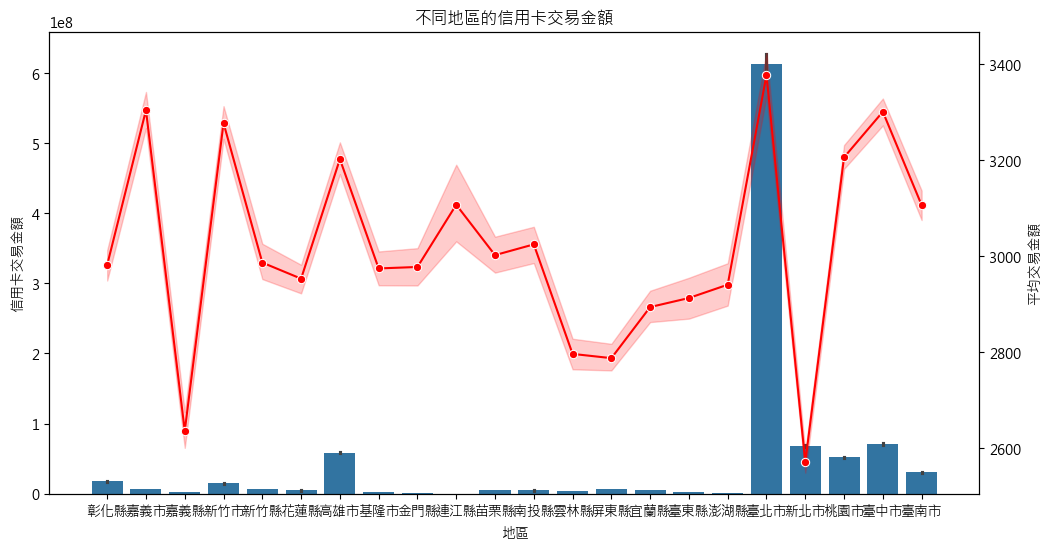

In [6]:
#依地區進行分析
matplotlib.rc('font', family='Microsoft JhengHei')
df['平均交易金額'] = df['信用卡交易金額[新台幣]'] / df['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', data=df)
plt.title('不同地區的信用卡交易金額')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='地區', y='平均交易金額', data=df, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

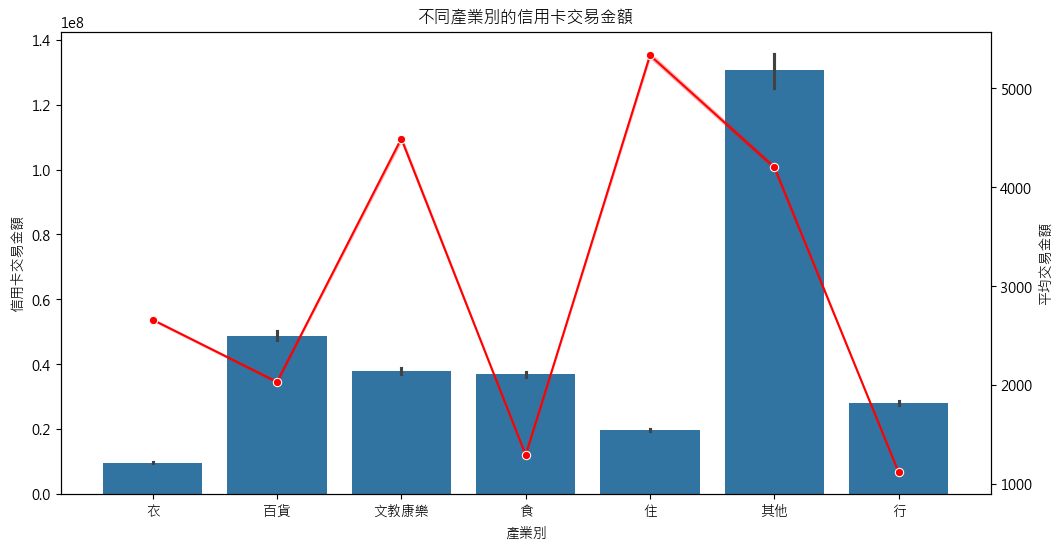

In [16]:
#依產業別分析
matplotlib.rc('font', family='Microsoft JhengHei')
df['平均交易金額'] = df['信用卡交易金額[新台幣]'] / df['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', data=df)
plt.title('不同產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')

ax2 = plt.twinx()
sns.lineplot(x='產業別', y='平均交易金額', data=df, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

依地區別分析圖表顯示交易集中於六都,依產業別圖表顯示其他類別交易比例高但無法得知確切產業,基於上述兩項原因資料取值[六都]及[食][衣][住][行][百貨][文教康樂]。

In [5]:
#截取六都及不含其他類別之資料
matplotlib.rc('font', family='Microsoft JhengHei')
#六都
df_area6 = pd.read_csv('./six_cities.csv') 
df_other = df[(df['產業別'] == '其他')] 

#六都不含其他類 
df_area6n = df_area6[(df_area6['產業別'] != '其他')]   

df_area6n = df_area6n[['年', '月', '地區', '產業別', '性別', '年齡層', '信用卡交易筆數', '信用卡交易金額[新台幣]']]
a = df_area6n['信用卡交易筆數'].sum()
x = df_area6['信用卡交易筆數'].sum()
y = df['信用卡交易筆數'].sum()
z = df_other['信用卡交易筆數'].sum()
percentage_n = a / y
percentage = x / y
percentage_o = z / y
print(f'六都(不含其他類)佔總交易筆數: {percentage_n:.2%}')
print(f'六都佔總交易筆數: {percentage:.2%}')
print(f'其他類佔總交易筆數:{percentage_o:.2%}')

print(df_area6n)

六都(不含其他類)佔總交易筆數: 68.71%
六都佔總交易筆數: 92.41%
其他類佔總交易筆數:24.30%
           年  月   地區 產業別  性別        年齡層  信用卡交易筆數  信用卡交易金額[新台幣]
0       2014  1  臺北市   食  女性      未滿20歲     2819       2615745
1       2014  1  臺北市   食  女性  20(含)-25歲    66270      66794381
2       2014  1  臺北市   食  女性  25(含)-30歲   227091     263753101
3       2014  1  臺北市   食  女性  30(含)-35歲   396113     490378285
4       2014  1  臺北市   食  女性  35(含)-40歲   498370     618092602
...      ... ..  ...  ..  ..        ...      ...           ...
137587  2023  9  高雄市   行  男性  60(含)-65歲    50439     109126842
137588  2023  9  高雄市   行  男性  65(含)-70歲    31387      57677827
137589  2023  9  高雄市   行  男性  70(含)-75歲    16872      32315853
137590  2023  9  高雄市   行  男性  75(含)-80歲     4559      10076219
137591  2023  9  高雄市   行  男性   80(含)歲以上     1752       3201237

[117936 rows x 8 columns]


In [15]:
df_area6n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117936 entries, 0 to 137591
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   年             117936 non-null  int64 
 1   月             117936 non-null  int64 
 2   地區            117936 non-null  object
 3   產業別           117936 non-null  object
 4   性別            117936 non-null  object
 5   年齡層           117936 non-null  object
 6   信用卡交易筆數       117936 non-null  int64 
 7   信用卡交易金額[新台幣]  117936 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 8.1+ MB


In [16]:
df_area6n.describe(include='all')

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
count,117936.000000,117936.000000,117936,117936,117936,117936,1.179360e+05,1.179360e+05
unique,NaN,NaN,6,6,2,14,NaN,NaN
top,NaN,NaN,臺北市,食,女性,未滿20歲,NaN,NaN
freq,NaN,NaN,19656,19656,58968,8424,NaN,NaN
mean,2018.384615,6.384615,NaN,NaN,NaN,NaN,6.476480e+04,9.726556e+07
std,2.815859,3.416531,NaN,NaN,NaN,NaN,2.068347e+05,2.064373e+08
min,2014.000000,1.000000,NaN,NaN,NaN,NaN,1.000000e+01,-3.058050e+05
25%,2016.000000,3.000000,NaN,NaN,NaN,NaN,2.686000e+03,6.571957e+06
50%,2018.000000,6.000000,NaN,NaN,NaN,NaN,1.389450e+04,3.660379e+07
75%,2021.000000,9.000000,NaN,NaN,NaN,NaN,4.763075e+04,9.577251e+07


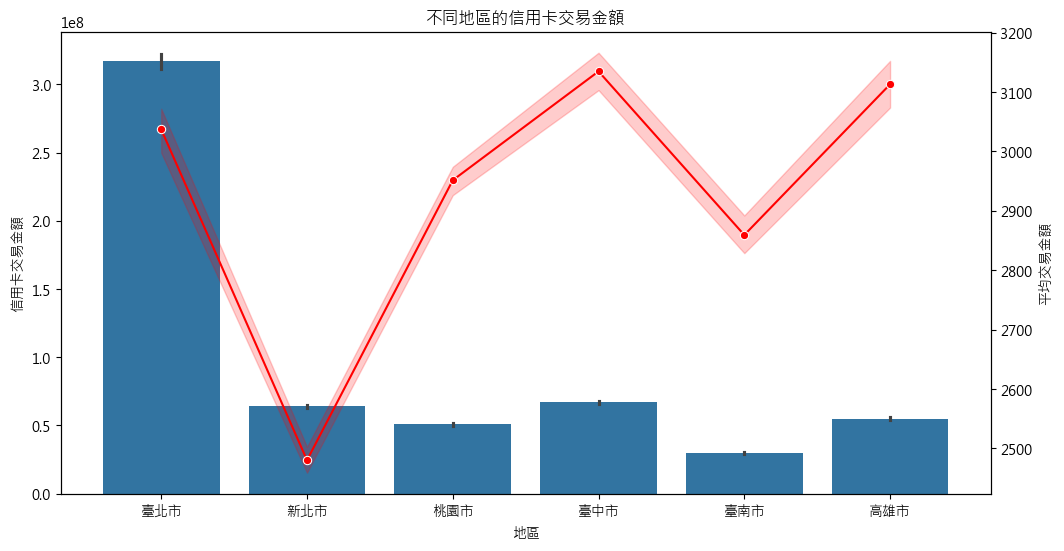

In [42]:
#六都(不含其他類)依區域進行分析
matplotlib.rc('font', family='Microsoft JhengHei')
df_area6n['平均交易金額'] = df_area6n['信用卡交易金額[新台幣]'] / df_area6n['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', data=df_area6n)
plt.title('不同地區的信用卡交易金額')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='地區', y='平均交易金額', data=df_area6n,color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

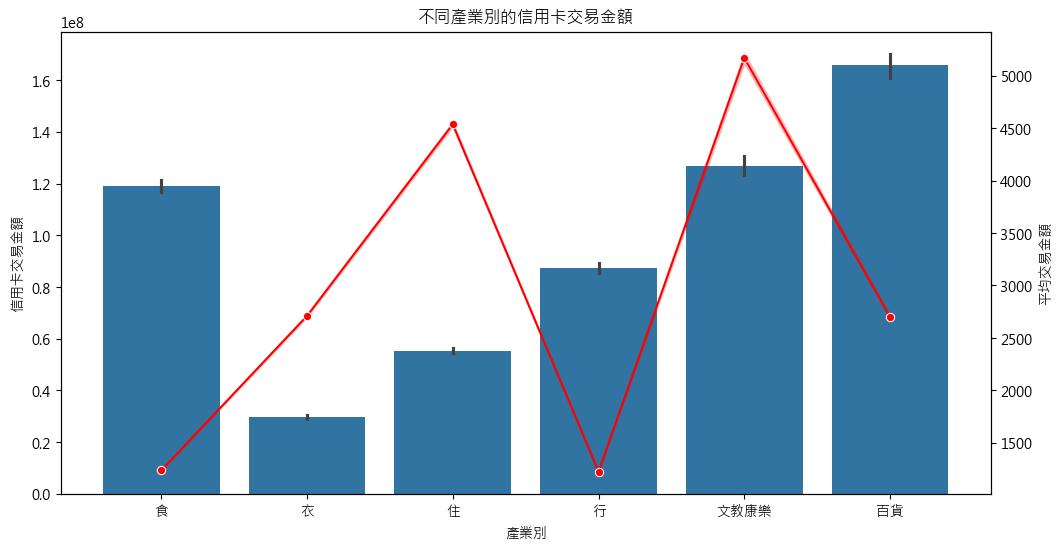

In [43]:
#六都(不含其他類)依產業別分析
matplotlib.rc('font', family='Microsoft JhengHei')
df_area6n['平均交易金額'] = df_area6n['信用卡交易金額[新台幣]'] / df_area6n['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', data=df_area6n)
plt.title('不同產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')

ax2 = plt.twinx()
sns.lineplot(x='產業別', y='平均交易金額', data=df_area6n, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

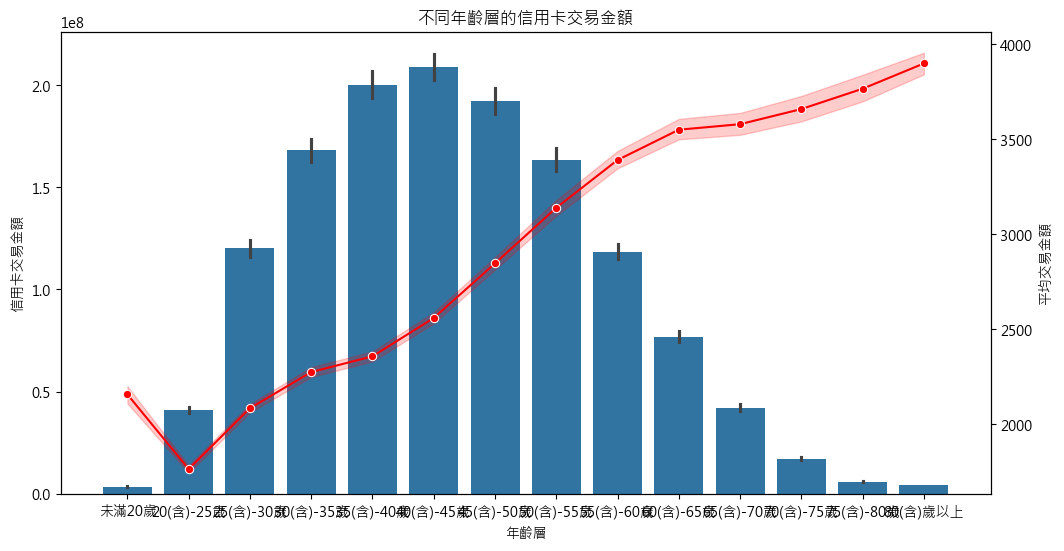

In [44]:
#依年齡層分析(六都不含其他類)
matplotlib.rc('font', family='Microsoft JhengHei')
df_area6n['平均交易金額'] = df_area6n['信用卡交易金額[新台幣]'] / df_area6n['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='年齡層', y='信用卡交易金額[新台幣]', data=df_area6n)
plt.title('不同年齡層的信用卡交易金額')
plt.xlabel('年齡層')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='年齡層', y='平均交易金額', data=df_area6n, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

In [17]:
df_area6n

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,2014,1,臺北市,食,女性,未滿20歲,2819,2615745
1,2014,1,臺北市,食,女性,20(含)-25歲,66270,66794381
2,2014,1,臺北市,食,女性,25(含)-30歲,227091,263753101
3,2014,1,臺北市,食,女性,30(含)-35歲,396113,490378285
4,2014,1,臺北市,食,女性,35(含)-40歲,498370,618092602
...,...,...,...,...,...,...,...,...
137587,2023,9,高雄市,行,男性,60(含)-65歲,50439,109126842
137588,2023,9,高雄市,行,男性,65(含)-70歲,31387,57677827
137589,2023,9,高雄市,行,男性,70(含)-75歲,16872,32315853
137590,2023,9,高雄市,行,男性,75(含)-80歲,4559,10076219


年         年齡層  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023
0   20(含)-25歲  1686  1653  1495  1496  1388  1205   950   687   624   608
1   25(含)-30歲  1842  1794  1662  1670  1589  1423  1111   859   824   801
2   30(含)-35歲  1956  1870  1742  1794  1737  1569  1228   983   948   923
3   35(含)-40歲  2036  1933  1791  1870  1821  1653  1293  1092  1049  1013
4   40(含)-45歲  2174  2078  1923  2025  1997  1833  1411  1222  1161  1135
5   45(含)-50歲  2366  2252  2081  2203  2183  2051  1585  1403  1332  1330
6   50(含)-55歲  2505  2391  2206  2351  2333  2227  1709  1565  1525  1548
7   55(含)-60歲  2594  2480  2279  2439  2409  2326  1742  1645  1644  1708
8   60(含)-65歲  2599  2491  2286  2484  2477  2411  1759  1712  1739  1845
9   65(含)-70歲  2632  2536  2316  2497  2459  2427  1709  1689  1752  1910
10  70(含)-75歲  2682  2566  2365  2551  2521  2493  1751  1734  1784  1928
11  75(含)-80歲  2701  2603  2416  2564  2584  2571  1799  1761  1819  2015
12   80(含)歲以上  3117  3051  2794  2953 

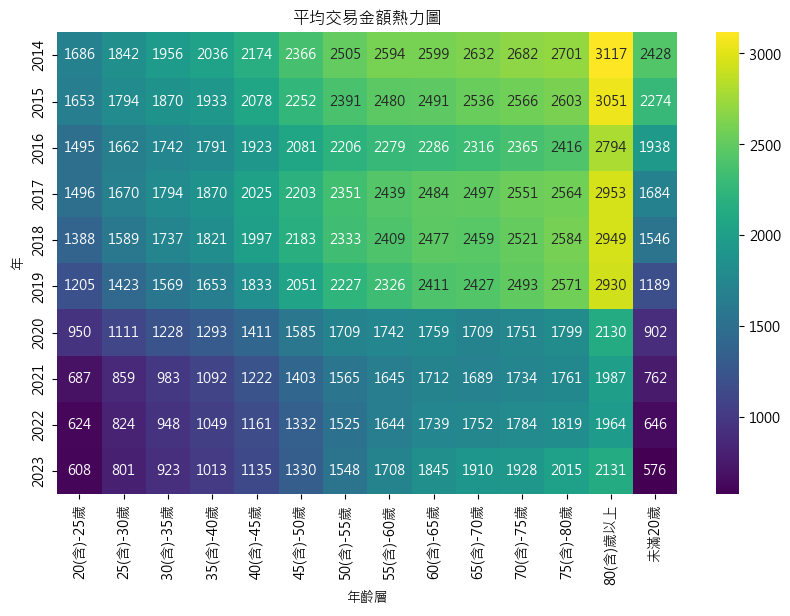

In [26]:
#六都(不含其他類)(年齡層、年度 平均交易金額熱力圖)
matplotlib.rc('font', family='Microsoft JhengHei')
grouped_data = df_area6n.groupby(['年', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='年', values='平均交易金額', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_year = pivot_table_year.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
print(pivot_table_year)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('平均交易金額熱力圖')
plt.show()

產業別        年齡層     住  文教康樂    百貨     行     衣     食
0    20(含)-25歲  2022  1943  1240   581  1783   422
1    25(含)-30歲  2722  2297  1551   722  2096   547
2    30(含)-35歲  3272  2654  1719   831  2218   652
3    35(含)-40歲  3444  3012  1800   924  2258   730
4    40(含)-45歲  3721  3644  1822  1010  2410   797
5    45(含)-50歲  4197  4728  1972  1086  2704   921
6    50(含)-55歲  4558  5636  2155  1139  3063  1049
7    55(含)-60歲  4924  6164  2228  1174  3425  1173
8    60(含)-65歲  5189  6935  2249  1189  3624  1259
9    65(含)-70歲  5091  7524  2098  1161  3671  1267
10   70(含)-75歲  4800  7779  1985  1179  3875  1294
11   75(含)-80歲  4972  8630  2094  1182  4067  1327
12    80(含)歲以上  5566  7820  2285  1359  4277  1478
13       未滿20歲  2339  1895  1424   560  1574   349


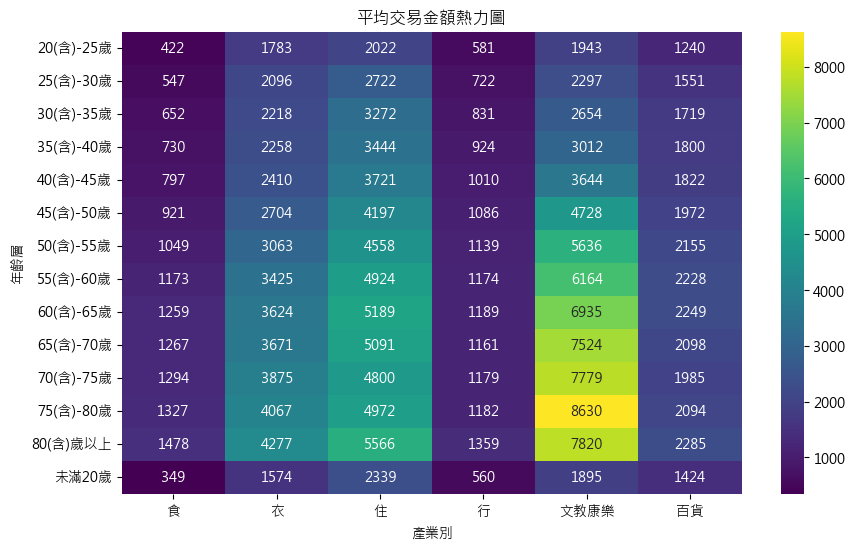

In [21]:
#六都(不含其他類)(年齡層、產業 平均交易金額熱力圖)
matplotlib.rc('font', family='Microsoft JhengHei')
grouped_data = df_area6n.groupby(['年齡層', '產業別']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']


pivot_table_industry = grouped_data.pivot_table(index='年齡層', columns=['產業別'], values='平均交易金額', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_industry = pivot_table_industry.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_industry.reset_index(inplace=True)

# 顯示結果
print(pivot_table_industry)

matplotlib.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_industry.set_index('年齡層')[['食', '衣', '住', '行', '文教康樂', '百貨']], cmap='viridis', annot=True, fmt=".0f")
plt.title('平均交易金額熱力圖')
plt.show()

地區        年齡層   新北市   桃園市   臺中市   臺北市   臺南市   高雄市
0   20(含)-25歲   618  1398  1401   764  1227  1387
1   25(含)-30歲   799  1705  1763   960  1576  1725
2   30(含)-35歲   959  1844  1952  1114  1736  1854
3   35(含)-40歲  1106  1919  1998  1223  1788  1873
4   40(含)-45歲  1243  2038  2120  1335  1874  1966
5   45(含)-50歲  1395  2229  2289  1556  1999  2128
6   50(含)-55歲  1514  2389  2418  1763  2125  2240
7   55(含)-60歲  1593  2459  2502  1883  2188  2291
8   60(含)-65歲  1657  2461  2534  2000  2185  2285
9   65(含)-70歲  1620  2365  2384  2059  2069  2132
10  70(含)-75歲  1595  2322  2299  2106  1968  2058
11  75(含)-80歲  1664  2363  2300  2255  2037  2063
12   80(含)歲以上  1880  2764  2670  2597  2410  2581
13      未滿20歲  1162  1201  1207   705  1103  1239


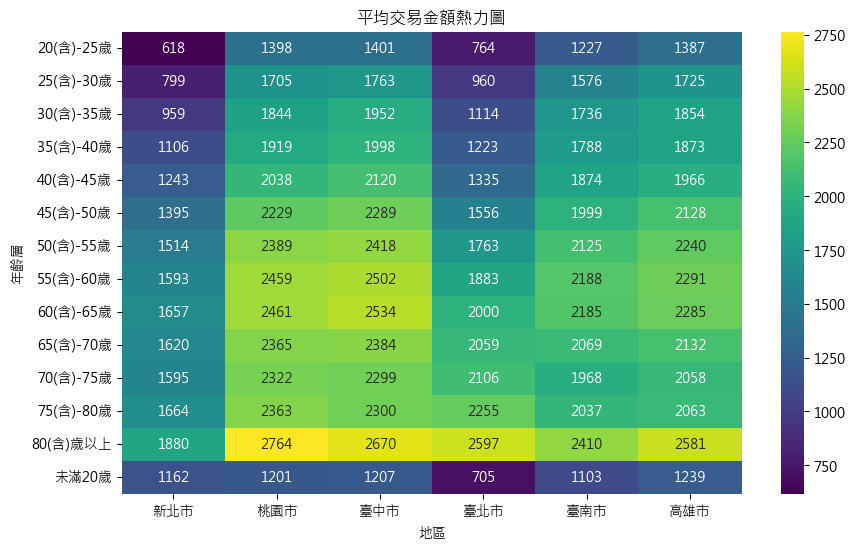

In [22]:
#六都(不含其他類)(年齡層、地區 平均交易金額熱力圖)
matplotlib.rc('font', family='Microsoft JhengHei')
grouped_data = df_area6n.groupby(['年齡層', '地區']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']


pivot_table_area = grouped_data.pivot_table(index='年齡層', columns=['地區'], values='平均交易金額', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_area = pivot_table_area.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_area.reset_index(inplace=True)

# 顯示結果
print(pivot_table_area)

matplotlib.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_area.set_index('年齡層'), cmap='viridis', annot=True, fmt=".0f")
plt.title('平均交易金額熱力圖')
plt.show()

數值太大熱力圖不好觀察,將[信用卡交易筆數]除以百萬,[信用卡交易金額[新台幣]]除以億

In [23]:
df_area6n['信用卡交易筆數'] = df_area6n['信用卡交易筆數']/1000000
df_area6n['信用卡交易金額[新台幣]'] = df_area6n['信用卡交易金額[新台幣]']/100000000

年         年齡層  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023
0   20(含)-25歲    11    13    15    16    20    25    36    75   102    86
1   25(含)-30歲    35    38    45    45    52    62    87   164   214   179
2   30(含)-35歲    59    63    69    62    66    76   100   183   237   203
3   35(含)-40歲    66    72    82    76    82    93   120   196   238   199
4   40(含)-45歲    61    66    75    71    76    87   114   184   234   205
5   45(含)-50歲    54    60    68    63    67    72    90   137   178   158
6   50(含)-55歲    42    47    55    51    55    59    73   104   129   112
7   55(含)-60歲    29    32    37    36    40    42    52    71    87    76
8   60(含)-65歲    17    20    24    23    26    27    33    43    52    46
9   65(含)-70歲     7     9    12    12    15    16    20    26    31    27
10  70(含)-75歲     3     3     4     4     5     6     8    11    14    14
11  75(含)-80歲     1     1     2     2     2     2     2     3     4     4
12   80(含)歲以上     1     1     1     1 

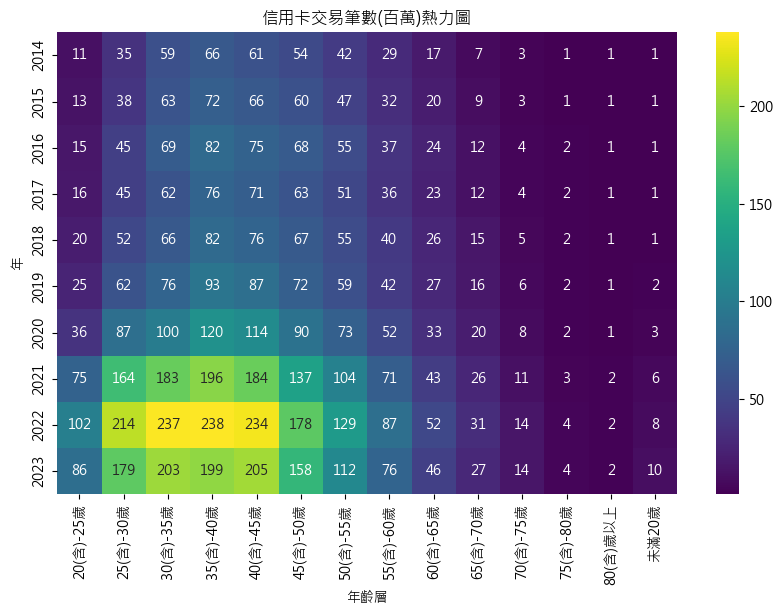

In [24]:
#六都(不含其他類)(年齡層、年度信用卡交易筆數熱力圖)
matplotlib.rc('font', family='Microsoft JhengHei')
grouped_data = df_area6n.groupby(['年', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']


pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='年', values='信用卡交易筆數', aggfunc='mean')


pivot_table_year = pivot_table_year.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
print(pivot_table_year)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易筆數(百萬)熱力圖')
plt.show()

年         年齡層  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023
0   20(含)-25歲   180   207   229   247   280   302   346   512   635   521
1   25(含)-30歲   651   684   747   753   822   882   968  1414  1760  1438
2   30(含)-35歲  1154  1175  1210  1118  1149  1196  1232  1797  2244  1877
3   35(含)-40歲  1337  1400  1477  1419  1491  1537  1548  2137  2494  2014
4   40(含)-45歲  1323  1361  1444  1435  1525  1593  1611  2252  2722  2332
5   45(含)-50歲  1286  1340  1424  1398  1462  1476  1420  1921  2366  2098
6   50(含)-55歲  1046  1116  1203  1208  1288  1312  1245  1634  1963  1741
7   55(含)-60歲   740   788   841   869   954   984   907  1169  1432  1298
8   60(含)-65歲   454   508   552   582   639   660   582   731   908   856
9   65(含)-70歲   177   221   267   312   361   388   339   432   537   516
10  70(含)-75歲    71    79    84    99   121   141   137   193   258   261
11  75(含)-80歲    28    33    37    42    49    51    43    53    73    80
12   80(含)歲以上    31    34    33    38 

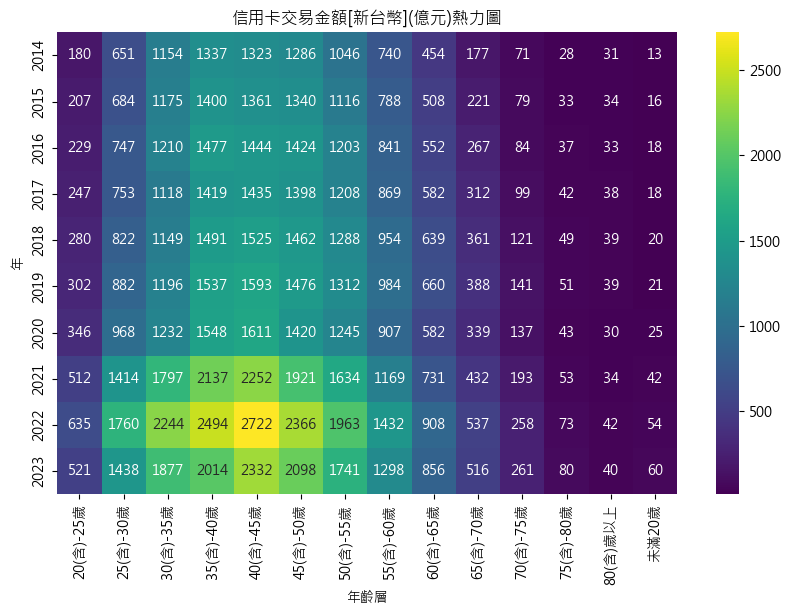

In [25]:
#六都(不含其他類)(年齡層、年度 信用卡交易金額[新台幣]熱力圖)
matplotlib.rc('font', family='Microsoft JhengHei')
grouped_data = df_area6n.groupby(['年', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='年', values='信用卡交易金額[新台幣]', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_year = pivot_table_year.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
print(pivot_table_year)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易金額[新台幣](億元)熱力圖')
plt.show()

產業別        年齡層     住  文教康樂    百貨     行    衣     食
0    20(含)-25歲   255   852   899   504  234   717
1    25(含)-30歲   876  2242  2841  1452  644  2063
2    30(含)-35歲  1379  2838  4082  2064  898  2892
3    35(含)-40歲  1631  3319  4944  2491  982  3486
4    40(含)-45歲  1661  3739  5130  2626  862  3580
5    45(含)-50歲  1505  3760  4558  2433  716  3218
6    50(含)-55歲  1303  3192  3846  2130  588  2697
7    55(含)-60歲   994  2161  2783  1605  424  2016
8    60(含)-65歲   663  1392  1769  1027  264  1358
9    65(含)-70歲   357   790   987   512  131   772
10   70(含)-75歲   138   319   430   184   49   324
11   75(含)-80歲    49   115   136    52   15   122
12    80(含)歲以上    40    97    87    34   18    85
13       未滿20歲    24    71    85    41   16    50


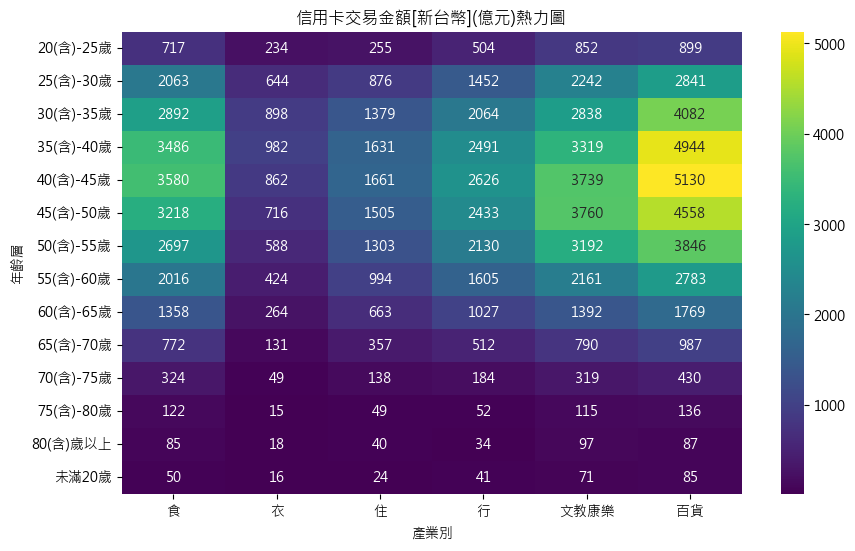

In [26]:
#六都(不含其他類)(年齡層、產業 信用卡交易金額[新台幣]熱力圖)
matplotlib.rc('font', family='Microsoft JhengHei')
grouped_data = df_area6n.groupby(['年齡層', '產業別']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_industry = grouped_data.pivot_table(index='年齡層', columns=['產業別'], values='信用卡交易金額[新台幣]', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_industry = pivot_table_industry.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_industry.reset_index(inplace=True)

# 顯示結果
print(pivot_table_industry)

matplotlib.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_industry.set_index('年齡層')[['食', '衣', '住', '行', '文教康樂', '百貨']], cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易金額[新台幣](億元)熱力圖')
plt.show()

產業別        年齡層   住  文教康樂   百貨    行   衣    食
0    20(含)-25歲  13    44   73   87  13  170
1    25(含)-30歲  32    98  183  201  31  377
2    30(含)-35歲  42   107  237  248  40  444
3    35(含)-40歲  47   110  275  270  44  478
4    40(含)-45歲  45   103  282  260  36  449
5    45(含)-50歲  36    80  231  224  26  350
6    50(含)-55歲  29    57  178  187  19  257
7    55(含)-60歲  20    35  125  137  12  172
8    60(含)-65歲  13    20   79   86   7  108
9    65(含)-70歲   7    10   47   44   4   61
10   70(含)-75歲   3     4   22   16   1   25
11   75(含)-80歲   1     1    7    4   0    9
12    80(含)歲以上   1     1    4    2   0    6
13       未滿20歲   1     4    6    7   1   14


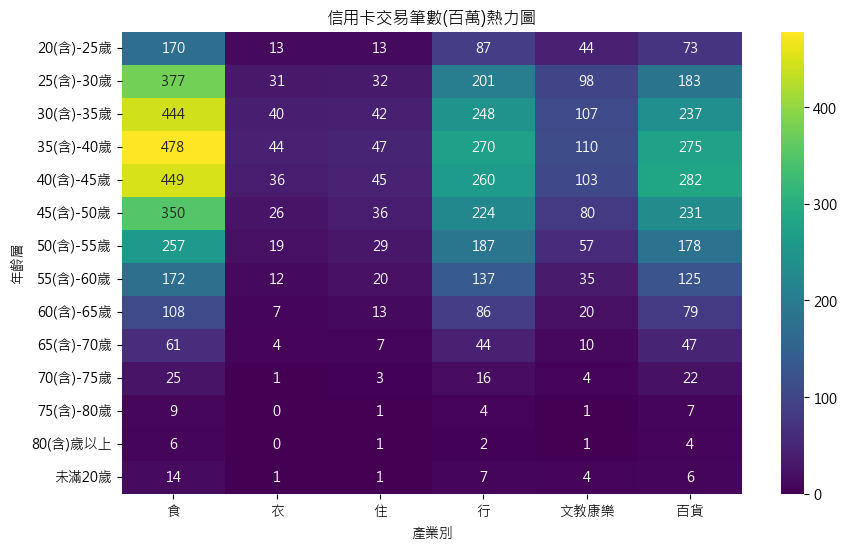

In [27]:
#六都(不含其他類)(年齡層、產業 信用卡交易筆數熱力圖)
matplotlib.rc('font', family='Microsoft JhengHei')
grouped_data = df_area6n.groupby(['年齡層', '產業別']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_industry = grouped_data.pivot_table(index='年齡層', columns=['產業別'], values='信用卡交易筆數', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_industry = pivot_table_industry.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_industry.reset_index(inplace=True)

# 顯示結果
print(pivot_table_industry)

matplotlib.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_industry.set_index('年齡層')[['食', '衣', '住', '行', '文教康樂', '百貨']], cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易筆數(百萬)熱力圖')
plt.show()

地區        年齡層   新北市   桃園市   臺中市   臺北市  臺南市   高雄市
0   20(含)-25歲   349   260   401  1985  165   299
1   25(含)-30歲  1014   818  1180  5747  499   859
2   30(含)-35歲  1466  1190  1622  7908  724  1243
3   35(含)-40歲  1834  1493  1907  9214  884  1521
4   40(含)-45歲  1979  1593  2002  9475  919  1631
5   45(含)-50歲  1776  1481  1894  8617  846  1577
6   50(含)-55歲  1517  1259  1635  7241  725  1378
7   55(含)-60歲  1140   897  1171  5218  522  1034
8   60(含)-65歲   755   547   721  3442  322   685
9   65(含)-70歲   424   275   370  1953  165   363
10  70(含)-75歲   174   102   141   826   63   140
11  75(含)-80歲    56    30    45   293   21    44
12   80(含)歲以上    37    25    30   221   14    33
13      未滿20歲    55    18    24   158   11    21


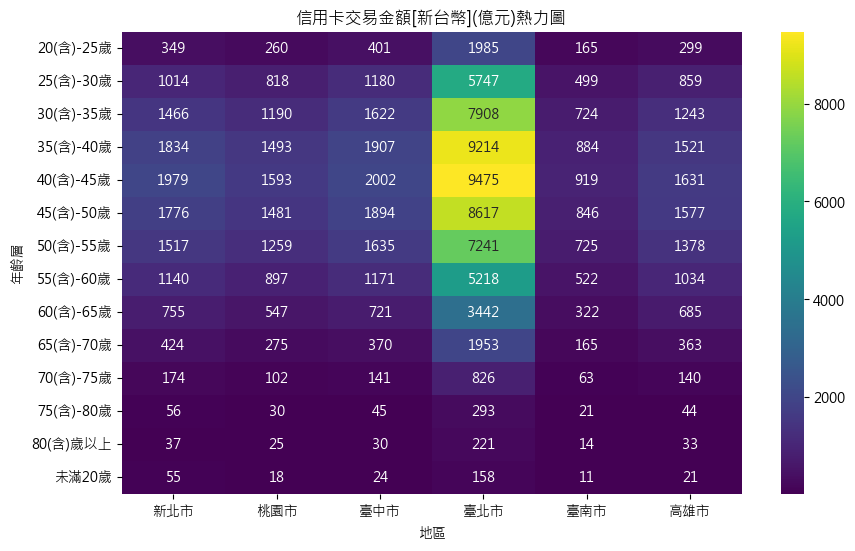

In [37]:
#六都(不含其他類)(年齡層、地區 信用卡交易金額[新台幣]熱力圖)
matplotlib.rc('font', family='Microsoft JhengHei')
grouped_data = df_area6n.groupby(['年齡層', '地區']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']


pivot_table_area = grouped_data.pivot_table(index='年齡層', columns=['地區'], values='信用卡交易金額[新台幣]', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_area = pivot_table_area.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_area.reset_index(inplace=True)

# 顯示結果
print(pivot_table_area)

matplotlib.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_area.set_index('年齡層'), cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易金額[新台幣](億元)熱力圖')
plt.show()

地區        年齡層  新北市  桃園市  臺中市  臺北市  臺南市  高雄市
0   20(含)-25歲   56   19   29  260   13   22
1   25(含)-30歲  127   48   67  598   32   50
2   30(含)-35歲  153   65   83  710   42   67
3   35(含)-40歲  166   78   95  753   49   81
4   40(含)-45歲  159   78   94  710   49   83
5   45(含)-50歲  127   66   83  554   42   74
6   50(含)-55歲  100   53   68  411   34   62
7   55(含)-60歲   72   36   47  277   24   45
8   60(含)-65歲   46   22   28  172   15   30
9   65(含)-70歲   26   12   16   95    8   17
10  70(含)-75歲   11    4    6   39    3    7
11  75(含)-80歲    3    1    2   13    1    2
12   80(含)歲以上    2    1    1    8    1    1
13      未滿20歲    5    1    2   22    1    2


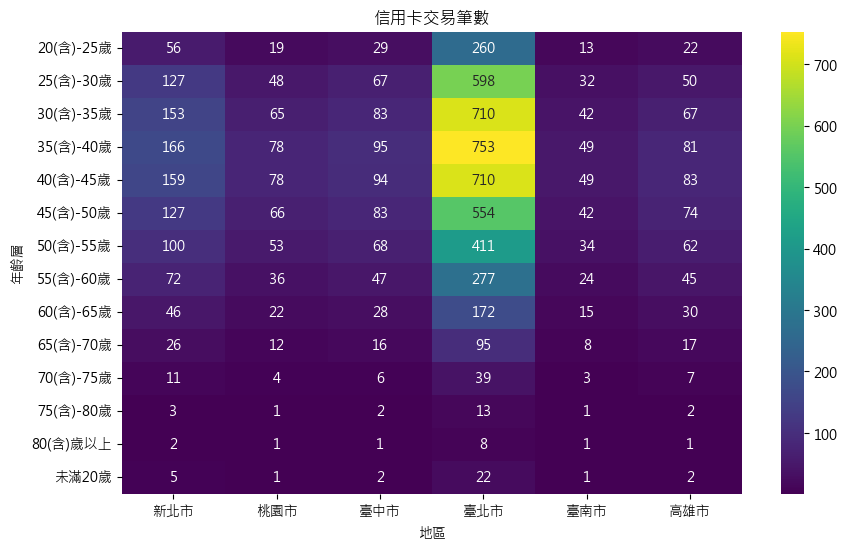

In [38]:
#六都(不含其他類)(年齡層、地區 信用卡交易筆數熱力圖)
matplotlib.rc('font', family='Microsoft JhengHei')
grouped_data = df_area6n.groupby(['年齡層', '地區']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']


pivot_table_area = grouped_data.pivot_table(index='年齡層', columns=['地區'], values='信用卡交易筆數', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_area = pivot_table_area.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_area.reset_index(inplace=True)

# 顯示結果
print(pivot_table_area)

matplotlib.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_area.set_index('年齡層'), cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易筆數')
plt.show()

In [1]:
import pandas as pd
import seaborn as sns

# 讀取數據
df = pd.read_csv("../processed_dataset.csv")

# 按照年月分组，計算每年各個月份的信用卡消費金額和交易筆數
monthly_total_expenses = df.groupby(["年月"]).agg({
    "信用卡交易金額[新台幣]": "sum",
    "信用卡交易筆數": "sum"
}).reset_index()

# 計算相關性
correlation_matrix = monthly_total_expenses.corr()

# 打印相關性矩陣
print("相關性矩陣：")
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
monthly_total_expenses

FileNotFoundError: [Errno 2] No such file or directory: 'dataview\\processed_dataset_encoded.csv'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Microsoft JhengHei"

df = pd.read_csv("./processed_dataset.csv")

df["年月"] = pd.to_datetime(df["年"].astype(str) + df["月"].astype(str), format="%Y%m")
df["年月"] = df["年月"].dt.strftime("%Y%m")

# 按照年月分组，計算每年各個月份的信用卡消費金額
monthly_total_expenses = df.groupby(["年月"])["信用卡交易金額[新台幣]"].sum().reset_index()

# 移除第一個月
monthly_total_expenses = monthly_total_expenses.iloc[1:]

# 將 '年月' 轉 datetime 取出年份和月份
monthly_total_expenses["年份"] = pd.to_datetime(
    monthly_total_expenses["年月"], format="%Y%m"
).dt.year
monthly_total_expenses["月份"] = pd.to_datetime(
    monthly_total_expenses["年月"], format="%Y%m"
).dt.month

X = monthly_total_expenses[["年份", "月份"]].astype(float)
y = monthly_total_expenses["信用卡交易金額[新台幣]"]

# 多項式特徵轉換
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# 預測2023年10月、11月和12月的信用卡消費金額
next_months = pd.DataFrame({"年份": [2023] * 3, "月份": [10, 11, 12]})
next_months_poly = poly.transform(next_months)

# 將預測的信用卡金額合併至DataFrame
next_months["預測信用卡金額"] = model.predict(next_months_poly)

# 特徵縮放(MinMaxScaler)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X_poly)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# 建立多項式迴歸模型
model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y_scaled)

# 預測2023年10月、11月和12月的信用卡消費金額
next_months_scaled = scaler_X.transform(next_months_poly)
next_months["預測信用卡金額_scaled"] = scaler_y.inverse_transform(
    model_scaled.predict(next_months_scaled).reshape(-1, 1)
).flatten()

r_squared_scaled = r2_score(y_scaled, model_scaled.predict(X_scaled))
print(f"R-squared value (scaled): {r_squared_scaled}")
mse_scaled = mean_squared_error(y_scaled, model_scaled.predict(X_scaled))
print(f"均方差 (scaled): {mse_scaled}")

print("預測信用卡金額:")
print(next_months[["年份", "月份", "預測信用卡金額"]])

plt.figure(figsize=(12, 6))
plt.plot(monthly_total_expenses["年月"], y, marker="o", label="實際信用卡金額")
plt.plot(
    next_months["年份"].astype(str) + next_months["月份"].astype(str).str.zfill(2),
    next_months["預測信用卡金額"],
    marker="o",
    linestyle="--",
    color="red",
    label="預測信用卡金額",
)
plt.title("每月信用卡金額及預測")
plt.xlabel("年月")
plt.ylabel("信用卡交易金額")
plt.xticks(monthly_total_expenses["年月"][::8])  # 每8個標籤顯示一次
plt.legend()
plt.show()

額外觀察六都產業別其他類資料

In [6]:
df_area6 = pd.read_csv('./six_cities.csv') 
df_other = df_area6[(df['產業別'] =='其他')]
df_other


C:\Users\User\AppData\Local\Temp\ipykernel_15064\2449656178.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_other = df_area6[(df['產業別'] =='其他')]


,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
16240,2018,1,臺北市,百貨,男性,未滿20歲,1435,3815826
16241,2018,1,臺北市,百貨,男性,20(含)-25歲,19404,51103800
16242,2018,1,臺北市,百貨,男性,25(含)-30歲,68217,199573787
16243,2018,1,臺北市,百貨,男性,30(含)-35歲,102230,315138681
16244,2018,1,臺北市,百貨,男性,35(含)-40歲,130459,384783742
...,...,...,...,...,...,...,...,...
133163,2016,11,高雄市,其他,男性,60(含)-65歲,15547,69856112
133164,2016,11,高雄市,其他,男性,65(含)-70歲,7458,36376081
133165,2016,11,高雄市,其他,男性,70(含)-75歲,2147,11302096
133166,2016,11,高雄市,其他,男性,75(含)-80歲,1015,6028112


年         年齡層  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023
0   20(含)-25歲  3150  3142  2492  1839  1555  1283   910  2286  2207  2159
1   25(含)-30歲  3366  3408  2827  2109  1776  1525  1116  2960  2937  3089
2   30(含)-35歲  3390  3455  3061  2276  2011  1714  1305  3136  3151  3084
3   35(含)-40歲  3467  3434  3112  2350  2233  1874  1495  3402  3444  3371
4   40(含)-45歲  3749  3627  3271  2543  2642  2166  1790  3654  3681  3706
5   45(含)-50歲  4175  4020  3634  2697  3075  2541  2187  3880  4057  4192
6   50(含)-55歲  4524  4327  3921  2862  3386  2882  2520  4036  4124  4248
7   55(含)-60歲  4897  4772  4211  3030  3754  3283  2886  4088  4350  4505
8   60(含)-65歲  5177  4912  4417  3152  4407  3573  3286  4747  4850  4886
9   65(含)-70歲  5438  5295  4891  3117  5519  4030  3694  4732  5072  5341
10  70(含)-75歲  5962  5965  5082  3092  5203  4611  4325  4731  5096  5256
11  75(含)-80歲  5779  5739  5698  3106  4760  4635  4300  5007  5484  5418
12   80(含)歲以上  8580  7770  7299  3651 

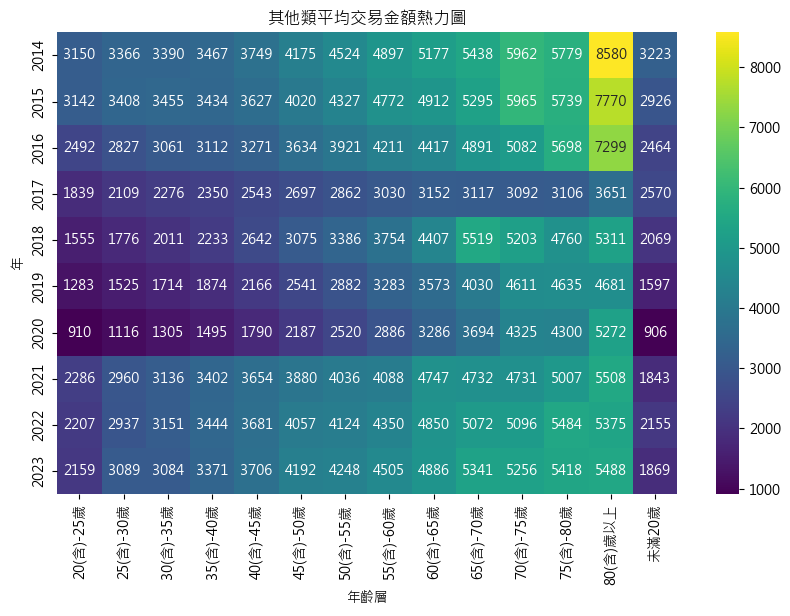

In [7]:
#其他類
matplotlib.rc('font', family='Microsoft JhengHei')
grouped_data = df_other.groupby(['年', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='年', values='平均交易金額', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_year = pivot_table_year.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
print(pivot_table_year)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('其他類平均交易金額熱力圖')
plt.show()


地區        年齡層   新北市   桃園市   臺中市   臺北市   臺南市   高雄市
0   20(含)-25歲  1044  1550  1520  1156  1465  2279
1   25(含)-30歲  1295  1846  1860  1376  1781  2704
2   30(含)-35歲  1439  1992  2034  1612  1953  2903
3   35(含)-40歲  1488  2041  2071  1867  1995  2998
4   40(含)-45歲  1624  2218  2236  2270  2119  3231
5   45(含)-50歲  1768  2388  2422  2809  2244  3514
6   50(含)-55歲  1838  2529  2568  3259  2402  3738
7   55(含)-60歲  1882  2647  2698  3808  2552  3954
8   60(含)-65歲  1870  2734  2882  4462  2658  4311
9   65(含)-70歲  1812  2736  2783  5532  2570  4549
10  70(含)-75歲  1782  2700  2752  5936  2695  4751
11  75(含)-80歲  1819  2766  2783  5785  2650  5027
12   80(含)歲以上  2087  3047  3171  6115  2864  6367
13      未滿20歲  1659  2254  1817  1302  2241  2194


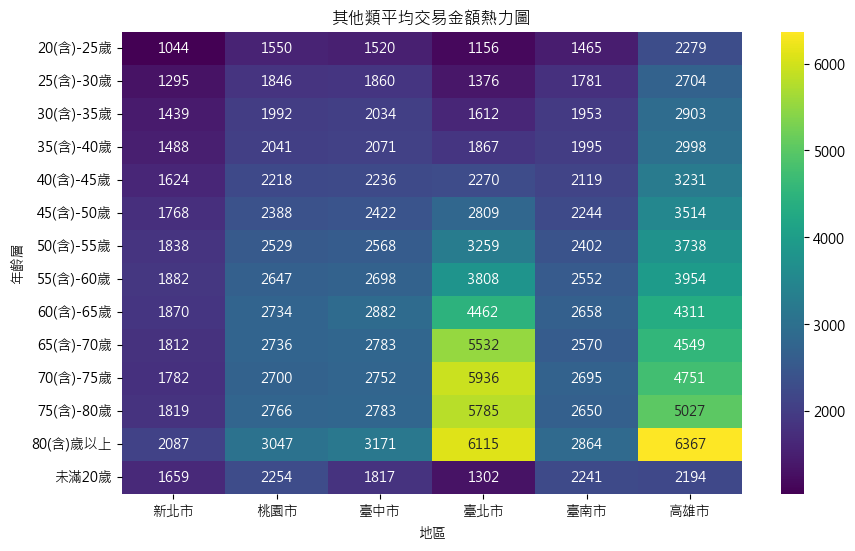

In [49]:
#其他類(年齡層、地區 平均交易金額熱力圖)
matplotlib.rc('font', family='Microsoft JhengHei')
grouped_data = df_other.groupby(['年齡層', '地區']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']


pivot_table_area = grouped_data.pivot_table(index='年齡層', columns=['地區'], values='平均交易金額', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_area = pivot_table_area.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_area.reset_index(inplace=True)

# 顯示結果
print(pivot_table_area)

matplotlib.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_area.set_index('年齡層'), cmap='viridis', annot=True, fmt=".0f")
plt.title('其他類平均交易金額熱力圖')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15064\1523485812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other['平均交易金額'] = df_other['信用卡交易金額[新台幣]'] / df_other['信用卡交易筆數']


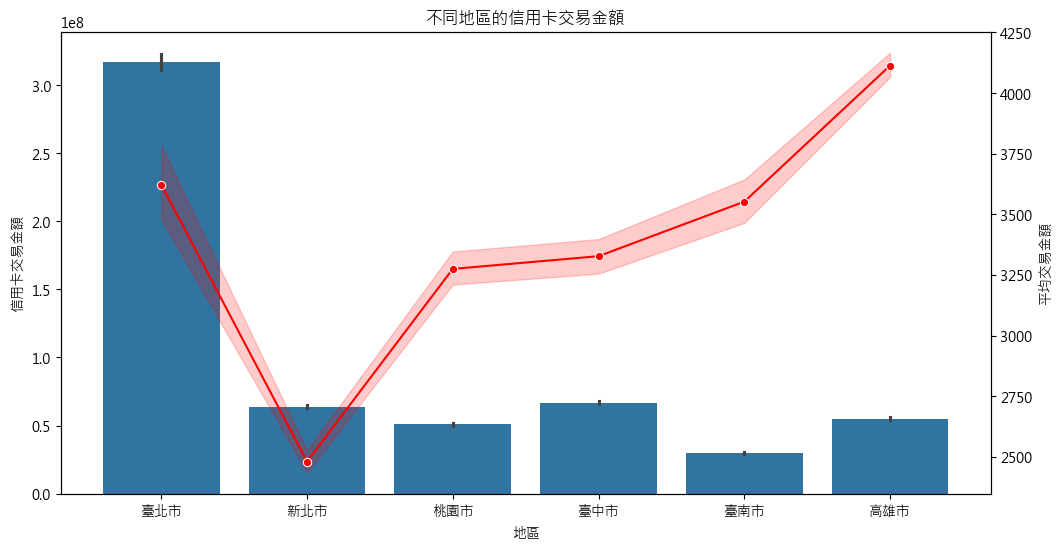

In [9]:
#其他類依區域進行分析
matplotlib.rc('font', family='Microsoft JhengHei')
df_other['平均交易金額'] = df_other['信用卡交易金額[新台幣]'] / df_other['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', data=df_area6n)
plt.title('不同地區的信用卡交易金額')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='地區', y='平均交易金額', data=df_other,color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

將信用卡筆數除以萬,信用卡交易金額[新台幣]除以億

In [59]:
#只能執行一次

df_other['信用卡交易筆數'] = df_other['信用卡交易筆數'] /10000
df_other['信用卡交易金額[新台幣]'] = df_other['信用卡交易金額[新台幣]'] /100000000

C:\Users\User\AppData\Local\Temp\ipykernel_4132\924449902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other['信用卡交易筆數'] = df_other['信用卡交易筆數'] /10000
C:\Users\User\AppData\Local\Temp\ipykernel_4132\924449902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other['信用卡交易金額[新台幣]'] = df_other['信用卡交易金額[新台幣]'] /100000000


地區        年齡層  新北市  桃園市  臺中市   臺北市  臺南市  高雄市
0   20(含)-25歲   39   33   51   345   18   53
1   25(含)-30歲  136  121  177  1184   63  166
2   30(含)-35歲  210  180  256  1750   99  252
3   35(含)-40歲  288  237  308  2383  125  315
4   40(含)-45歲  298  243  292  2550  120  342
5   45(含)-50歲  271  218  276  2438  108  334
6   50(含)-55歲  236  191  249  2216   97  290
7   55(含)-60歲  185  146  189  1829   74  214
8   60(含)-65歲  126   98  129  1394   50  141
9   65(含)-70歲   78   58   75  1019   30   70
10  70(含)-75歲   29   20   26   412   11   26
11  75(含)-80歲   11    7   11   143    5    9
12   80(含)歲以上    8    5    8   116    3   10
13      未滿20歲    4    3    3    26    2    3


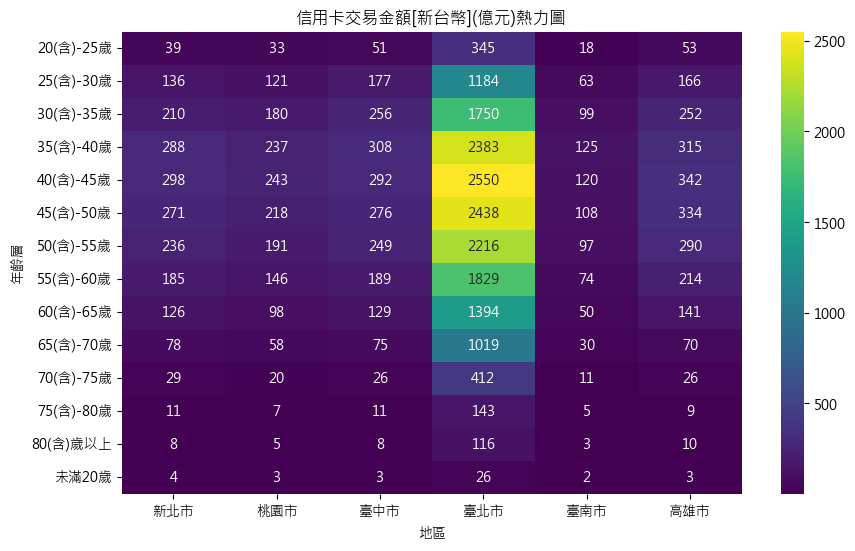

In [60]:
#其他類(年齡層、地區 信用卡交易金額[新台幣]熱力圖)
matplotlib.rc('font', family='Microsoft JhengHei')
grouped_data = df_other.groupby(['年齡層', '地區']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']


pivot_table_area = grouped_data.pivot_table(index='年齡層', columns=['地區'], values='信用卡交易金額[新台幣]', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_area = pivot_table_area.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_area.reset_index(inplace=True)

# 顯示結果
print(pivot_table_area)

matplotlib.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_area.set_index('年齡層'), cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易金額[新台幣](億元)熱力圖')
plt.show()

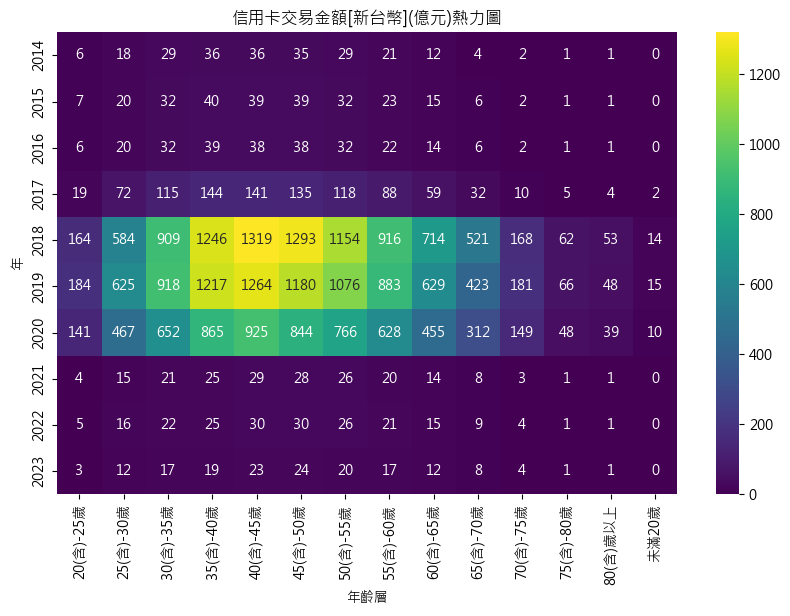

In [62]:
#其他類(年齡層、地區 信用卡交易金額[新台幣]熱力圖)
matplotlib.rc('font', family='Microsoft JhengHei')

grouped_data = df_other.groupby(['年', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='年', values='信用卡交易金額[新台幣]', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_year = pivot_table_year.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
#print(pivot_table_year)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易金額[新台幣](億元)熱力圖')
plt.show()

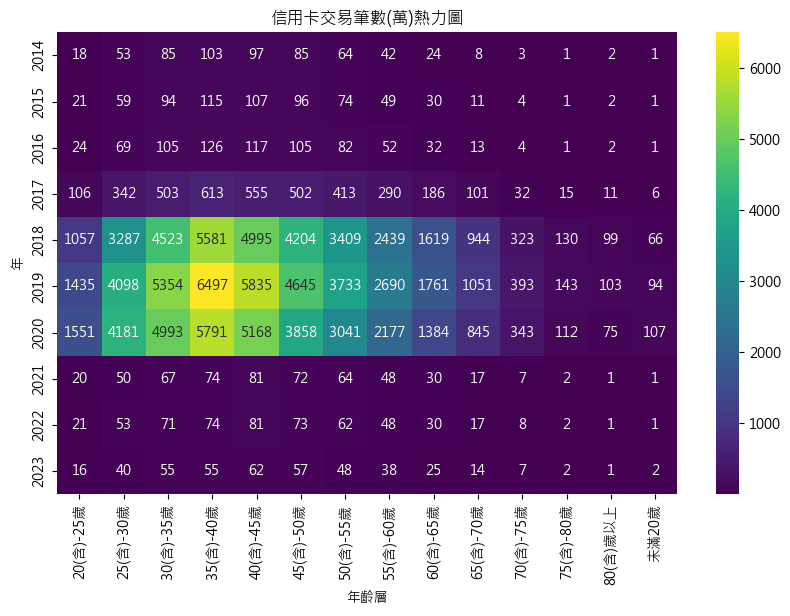

In [61]:
#其他類(年齡層、地區 信用卡交易金額[新台幣]熱力圖)
matplotlib.rc('font', family='Microsoft JhengHei')

grouped_data = df_other.groupby(['年', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='年', values='信用卡交易筆數', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_year = pivot_table_year.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
#print(pivot_table_year)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易筆數(萬)熱力圖')
plt.show()


地區        年齡層   新北市   桃園市   臺中市    臺北市  臺南市   高雄市
0   20(含)-25歲   378   216   336   2980  126   232
1   25(含)-30歲  1049   657   951   8605  355   615
2   30(含)-35歲  1460   902  1257  10856  508   867
3   35(含)-40歲  1936  1162  1486  12764  629  1052
4   40(含)-45歲  1838  1094  1306  11233  568  1059
5   45(含)-50歲  1533   914  1141   8679  481   950
6   50(含)-55歲  1282   754   971   6802  405   776
7   55(含)-60歲   983   553   701   4804  292   542
8   60(含)-65歲   676   358   448   3124  188   328
9   65(含)-70歲   431   211   268   1842  115   154
10  70(含)-75歲   163    76    96    693   40    55
11  75(含)-80歲    59    27    40    248   17    17
12   80(含)歲以上    37    18    25    190   11    15
13      未滿20歲    26    14    19    201    8    12


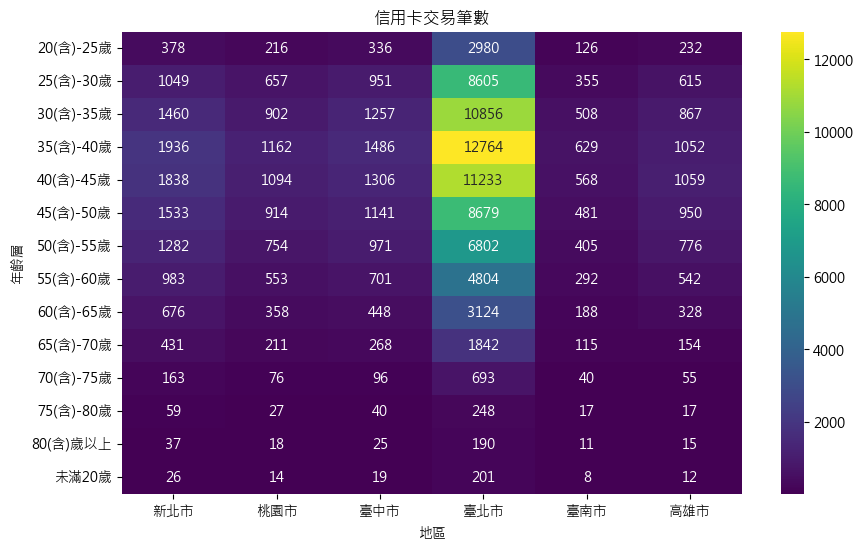

In [65]:
#其他類)(年齡層、地區 信用卡交易筆數熱力圖)
matplotlib.rc('font', family='Microsoft JhengHei')
grouped_data = df_other.groupby(['年齡層', '地區']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']


pivot_table_area = grouped_data.pivot_table(index='年齡層', columns=['地區'], values='信用卡交易筆數', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_area = pivot_table_area.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_area.reset_index(inplace=True)

# 顯示結果
print(pivot_table_area)

matplotlib.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_area.set_index('年齡層'), cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易筆數')
plt.show()